In [1]:
import librosa
import numpy as np
import sounddevice as sd
import IPython.display as ipd
import matplotlib.pyplot as plt

from models import get_full_model, get_speaker_embedding_model, load_saved_model
from inference import inference_input
from utterance_utils import mag_spectro2wav

In [2]:
model = get_full_model()

In [3]:
model.load_weights('pretrained_models/model1351.hdf5', by_name=True)
model.load_weights('pretrained_models/model184.hdf5', by_name=True)

In [ ]:
fs = 32000
myrecording, _ = librosa.load('real_world_audio/Record (online-voice-recorder.com).mp3', sr=fs, mono=True)
myrecording = myrecording[:5*fs]

In [4]:
duration = 3  # seconds
fs = 32000

myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1, blocking=True)
myrecording = np.squeeze(myrecording)

In [5]:
ipd.Audio(myrecording, rate=fs)

In [6]:
inp = inference_input('Man is a social animal. Ants, bees.$', myrecording, 200)

In [7]:
decoder_pred, postnet_out, alignments, embeddings = model.predict(inp)

In [8]:
# predicted
y = mag_spectro2wav(postnet_out[0], gl_power=1.3)
ipd.Audio(y, rate=32000)

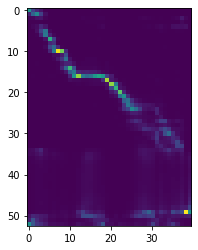

In [9]:
plt.imshow(alignments[0].T)

In [10]:
embeddings[0].shape

(256,)

In [ ]:
np.save('embeddings.npy', embeddings[0])